In [46]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import collections
import re
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network




In [47]:
data = pd.read_csv("C:/Users/ikry/LaD/Labs/Lab3_SentenceAnalysis/Lab3_SentenceAnalysis/data/sentences.csv")
data.head()

,darija,eng
0,"homa mkhbbyin chi haja, ana mti99en!","They're hiding something, I'm sure!"
1,bayna homa tay7awlo ib9aw mbrrdin.,It's obvious they're trying to keep their cool.
2,loTilat mabaynach fihom mori7in bzzaf.,the hotels don't seem very comfortable.
3,ghaliban ghayjrriw 3lih mn lkhdma!,he is probably about to be laid off by head of...
4,Tab3an rah mkta2eb!,of course he's depressive!


In [48]:
# inspect the first few rows
print(data.head())

# check the columns 
print(data.columns)

# check for missing values
print(data.isnull().sum())

# general information about the dataset
print(data.info())


                                   darija  \
0    homa mkhbbyin chi haja, ana mti99en!   
1      bayna homa tay7awlo ib9aw mbrrdin.   
2  loTilat mabaynach fihom mori7in bzzaf.   
3      ghaliban ghayjrriw 3lih mn lkhdma!   
4                     Tab3an rah mkta2eb!   

                                                 eng  
0                They're hiding something, I'm sure!  
1    It's obvious they're trying to keep their cool.  
2            the hotels don't seem very comfortable.  
3  he is probably about to be laid off by head of...  
4                         of course he's depressive!  
Index(['darija', 'eng'], dtype='object')
darija    0
eng       7
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45378 entries, 0 to 45377
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   darija  45378 non-null  object
 1   eng     45371 non-null  object
dtypes: object(2)
memory usage: 709.2+ KB
None


I will perform dataset analysis only on the first 1000 sentences

In [49]:
df = data[:1000]
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   darija  1000 non-null   object
 1   eng     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None
                                   darija  \
0    homa mkhbbyin chi haja, ana mti99en!   
1      bayna homa tay7awlo ib9aw mbrrdin.   
2  loTilat mabaynach fihom mori7in bzzaf.   
3      ghaliban ghayjrriw 3lih mn lkhdma!   
4                     Tab3an rah mkta2eb!   

                                                 eng  
0                They're hiding something, I'm sure!  
1    It's obvious they're trying to keep their cool.  
2            the hotels don't seem very comfortable.  
3  he is probably about to be laid off by head of...  
4                         of course he's depressive!  


### TTR

In [50]:
nltk.download('punkt_tab')

def tokenize_text(text):
    return word_tokenize(text)

df['darija_tokens'] = df['darija'].apply(tokenize_text)
df['eng_tokens'] = df['eng'].apply(tokenize_text)

print(df.head())


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ikry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\ikry\AppData\Local\Temp\ipykernel_14792\1822125532.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['darija_tokens'] = df['darija'].apply(tokenize_text)


                                   darija  \
0    homa mkhbbyin chi haja, ana mti99en!   
1      bayna homa tay7awlo ib9aw mbrrdin.   
2  loTilat mabaynach fihom mori7in bzzaf.   
3      ghaliban ghayjrriw 3lih mn lkhdma!   
4                     Tab3an rah mkta2eb!   

                                                 eng  \
0                They're hiding something, I'm sure!   
1    It's obvious they're trying to keep their cool.   
2            the hotels don't seem very comfortable.   
3  he is probably about to be laid off by head of...   
4                         of course he's depressive!   

                                     darija_tokens  \
0  [homa, mkhbbyin, chi, haja, ,, ana, mti99en, !]   
1       [bayna, homa, tay7awlo, ib9aw, mbrrdin, .]   
2   [loTilat, mabaynach, fihom, mori7in, bzzaf, .]   
3       [ghaliban, ghayjrriw, 3lih, mn, lkhdma, !]   
4                        [Tab3an, rah, mkta2eb, !]   

                                          eng_tokens  
0  [They, 'r

C:\Users\ikry\AppData\Local\Temp\ipykernel_14792\1822125532.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eng_tokens'] = df['eng'].apply(tokenize_text)


In [51]:
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

def calculate_ttr_for_column(tokens_column):
    # Combine all the tokens from the entire column into a single list
    all_tokens = [token for tokens in tokens_column for token in tokens]
    
    token_frequencies = Counter(all_tokens)
    num_types = len(token_frequencies.keys())
    num_tokens = sum(token_frequencies.values())
    tt_ratio = num_types / float(num_tokens) if num_tokens > 0 else 0
    
    return tt_ratio

df['darija_tokens'] = df['darija'].apply(tokenize_text)
df['eng_tokens'] = df['eng'].apply(tokenize_text)

# Calculate TTR for the entire Darija and English columns
darija_ttr = calculate_ttr_for_column(df['darija_tokens'])
eng_ttr = calculate_ttr_for_column(df['eng_tokens'])

print(f'Darija TTR: {darija_ttr}')
print(f'English TTR: {eng_ttr}')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ikry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\ikry\AppData\Local\Temp\ipykernel_14792\490003859.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['darija_tokens'] = df['darija'].apply(tokenize_text)


Darija TTR: 0.3748036991798988
English TTR: 0.17425867507886436


C:\Users\ikry\AppData\Local\Temp\ipykernel_14792\490003859.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eng_tokens'] = df['eng'].apply(tokenize_text)


### N-grams for non-standardized spelling

In [52]:
dataset = pd.read_csv("C:/Users/ikry/LaD/Labs/Lab3_SentenceAnalysis/Lab3_SentenceAnalysis/data/utils.csv")

# extract the text data (all rows in the dataset, each representing a variant of a word)
corpus1 = dataset.iloc[:, :-1].fillna('missing').values.flatten()


In [53]:
def generate_ngrams(text, n=3):
    """
    Generates n-grams from the text at the character level.
    """
    ngrams = []
    words = text.split()  
    
    for word in words:
        # Ensure the word is cleaned of any unwanted characters and punctuation
        word = re.sub(r'\W+', '', word)
        
        # Generate n-grams for the word
        word_ngrams = [word[i:i+n] for i in range(len(word) - n + 1)]
        
        ngrams.extend(word_ngrams)  # Add the n-grams to the list
        
    return ngrams

def get_ngram_frequencies(corpus, n=3):
    """
    Computes the frequency of n-grams in the given corpus.
    """
    ngram_freq = collections.Counter()
    
    for sentence in corpus:
        ngrams = generate_ngrams(sentence, n)
        ngram_freq.update(ngrams)  
    
    return ngram_freq

ngram_frequencies = get_ngram_frequencies(corpus1, n=3)

print("Most common trigrams:")
for ngram, freq in ngram_frequencies.most_common(15):
    print(f"'{ngram}': {freq}")


Most common trigrams:
'ssi': 402
'mis': 401
'iss': 401
'sin': 401
'ing': 401
'3nd': 36
'ndo': 34
'lla': 32
'3la': 25
'and': 24
'lah': 22
'7al': 20
'all': 20
'ma3': 18
'oum': 16


## example with variations of one word

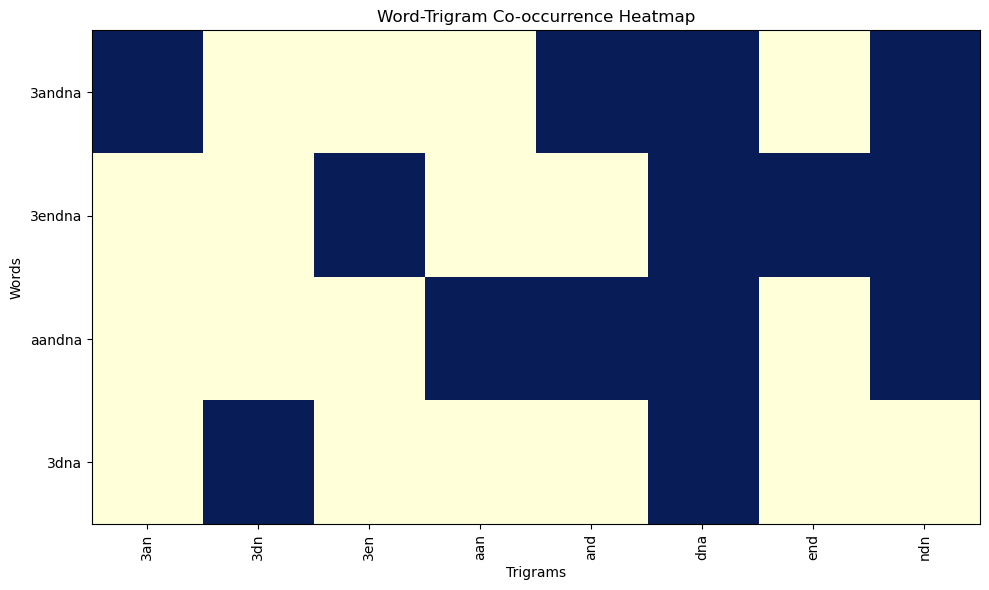

In [57]:
example1 = ["3andna", "aandna", "3dna", "3endna"] 

# Generate trigrams and words mapping
trigram_to_words = {}
for word in example1:
    trigrams = [word[i:i+3] for i in range(len(word) - 2)]  
    for trigram in trigrams:
        if trigram not in trigram_to_words:
            trigram_to_words[trigram] = []
        trigram_to_words[trigram].append(word)

# Preparing data for the heatmap as a list of unique trigrams 
trigram_labels = sorted(trigram_to_words.keys())  
word_labels = list(set(example1))  # Unique words
word_trigram_matrix = np.zeros((len(word_labels), len(trigram_labels)))

# Count occurrence of trigrams in words
for i, word in enumerate(word_labels):
    for j, trigram in enumerate(trigram_labels):
        word_trigram_matrix[i][j] = sum(1 for k in range(len(word)-2) if word[k:k+3] == trigram)


plt.figure(figsize=(10, 6))
plt.imshow(word_trigram_matrix, cmap='YlGnBu', aspect='auto')  
plt.xticks(ticks=range(len(trigram_labels)), labels=trigram_labels, rotation=90)
plt.yticks(ticks=range(len(word_labels)), labels=word_labels)

plt.title("Word-Trigram Co-occurrence Heatmap")
plt.xlabel("Trigrams")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


## triagram-to-word mapping 

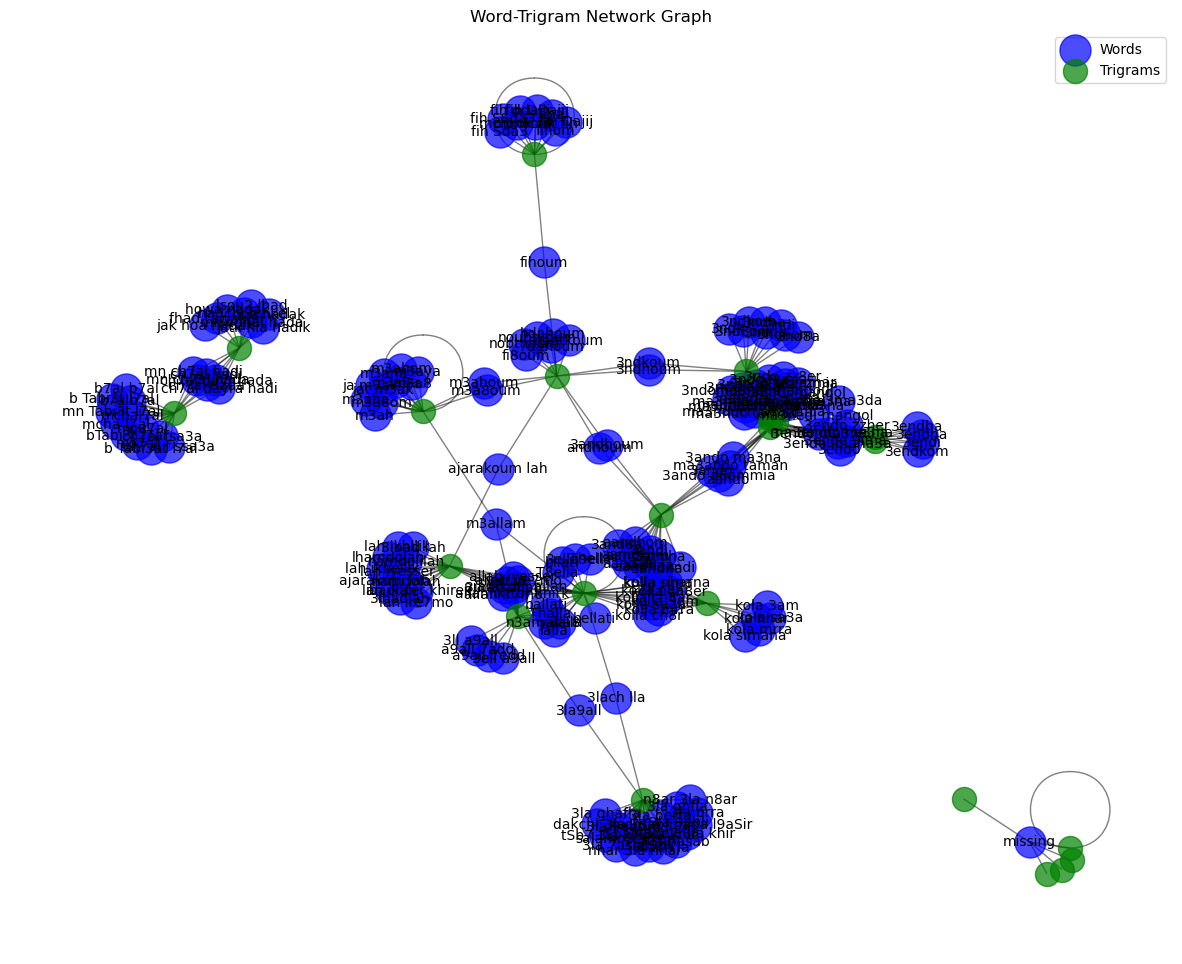

In [55]:
min_frequency = 15  # Setting a threshold for trigram frequency
filtered_trigrams = {k: v for k, v in ngram_frequencies.items() if v >= min_frequency}

filtered_trigram_to_words = {trigram: [] for trigram in filtered_trigrams.keys()}
for word in corpus1:
    trigrams = [word[i:i+3] for i in range(len(word) - 2)]  
    for trigram in trigrams:
        if trigram in filtered_trigram_to_words:
            filtered_trigram_to_words[trigram].append(word)


G = nx.Graph()
for trigram, words in filtered_trigram_to_words.items():
    for word in words:
        G.add_node(word, label='word')  
        G.add_node(trigram, label='trigram')  
        G.add_edge(word, trigram)  


plt.figure(figsize=(15, 12))

# Position nodes using a spring layout
pos = nx.spring_layout(G, seed=42)

word_nodes = [node for node, attr in G.nodes(data=True) if attr['label'] == 'word']
trigram_nodes = [node for node, attr in G.nodes(data=True) if attr['label'] == 'trigram']

nx.draw_networkx_nodes(G, pos, nodelist=word_nodes, node_color='blue', node_size=500, alpha=0.7, label='Words')
nx.draw_networkx_nodes(G, pos, nodelist=trigram_nodes, node_color='green', node_size=300, alpha=0.7, label='Trigrams')
nx.draw_networkx_edges(G, pos, alpha=0.5)


word_labels = {node: node for node in word_nodes}
nx.draw_networkx_labels(G, pos, labels=word_labels, font_size=10, font_color='black')


plt.legend(["Words", "Trigrams"], loc='upper right')
plt.title("Word-Trigram Network Graph")
plt.axis('off')
plt.show()


## visualization with pyvis network

In [56]:
net = Network(notebook=True, height='800px', width='100%', bgcolor='#222222', font_color='white')

for trigram, words in filtered_trigram_to_words.items():
    net.add_node(trigram, label=trigram, color='green')
    for word in words:
        net.add_node(word, label=word, color='blue')
        net.add_edge(word, trigram)

net.show('word_trigram_graph.html')


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
